<a href="https://colab.research.google.com/github/bkkaggle/pytorch-CycleGAN-and-pix2pix/blob/master/CycleGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Take a look at the [repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix) for more information

# Install

In [1]:
# !git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

In [2]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [4]:
# !pip install -r requirements.txt

# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_cyclegan_dataset.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Or use your own dataset by creating the appropriate folders and adding in the images.

-   Create a dataset folder under `/dataset` for your dataset.
-   Create subfolders `testA`, `testB`, `trainA`, and `trainB` under your dataset's folder. Place any images you want to transform from a to b (cat2dog) in the `testA` folder, images you want to transform from b to a (dog2cat) in the `testB` folder, and do the same for the `trainA` and `trainB` folders.

In [5]:
!bash ./datasets/download_cyclegan_dataset.sh monet2photo

#### Pretrained models are loaded. The tuning and changes to parameters has been done in train_options.py file & the util files.

> We can also our own  pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [6]:
!bash ./scripts/download_cyclegan_model.sh monet2photo

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [monet2photo]
for details.

--2020-03-12 22:33:13--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/monet2photo.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.189.73
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.189.73|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/monet2photo_pretrained/latest_net_G.pth’

./checkpoints/monet 100%[===================>]  43.46M  17.3MB/s    in 2.5s    

2020-03-12 22:33:16 (17.3 MB/s) - ‘./checkpoints/monet2photo_pretrained/latest_net_G.pth’ saved [45575747/45575747]



# Training

-   `python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. I've found that a batch size of 16 fits onto 4 V100s and can finish training an epoch in ~90s.

Once your model has trained, copy over the last checkpoint to a format that the testing model can automatically detect:

Use `cp ./checkpoints/horse2zebra/latest_net_G_A.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class A to class B and `cp ./checkpoints/horse2zebra/latest_net_G_B.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class B to class A.


In [ ]:
!python train.py --dataroot ./datasets/monet2photo --name monet2photo --model cycle_gan

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/monet2photo        	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
              



Could not connect to Visdom server. 
 Trying to start a server....
Command: /home/ubuntu/anaconda3/bin/python -m visdom.server -p 8097 &>/dev/null &
create web directory ./checkpoints/monet2photo/web...
End of epoch 1 / 200 	 Time Taken: 67 sec
learning rate = 0.0002000
(epoch: 2, iters: 10, time: 0.785, data: 0.169) D_A: 0.303 G_A: 0.416 cycle_A: 2.325 idt_A: 1.068 D_B: 0.362 G_B: 0.280 cycle_B: 2.307 idt_B: 1.110 
End of epoch 2 / 200 	 Time Taken: 66 sec
learning rate = 0.0002000
(epoch: 3, iters: 20, time: 0.788, data: 0.001) D_A: 0.338 G_A: 0.235 cycle_A: 1.854 idt_A: 1.919 D_B: 0.309 G_B: 0.409 cycle_B: 4.254 idt_B: 0.828 
End of epoch 3 / 200 	 Time Taken: 66 sec
learning rate = 0.0002000
(epoch: 4, iters: 30, time: 0.788, data: 0.002) D_A: 0.292 G_A: 0.311 cycle_A: 2.331 idt_A: 1.723 D_B: 0.234 G_B: 0.512 cycle_B: 3.419 idt_B: 1.090 
End of epoch 4 / 200 	 Time Taken: 66 sec
learning rate = 0.0002000
(epoch: 5, iters: 40, time: 1.303, data: 0.002) D_A: 0.314 G_A: 0.364 cycle_

End of epoch 38 / 200 	 Time Taken: 66 sec
learning rate = 0.0002000
(epoch: 39, iters: 80, time: 0.788, data: 0.001) D_A: 0.152 G_A: 0.612 cycle_A: 1.890 idt_A: 0.794 D_B: 0.170 G_B: 0.548 cycle_B: 1.815 idt_B: 0.777 
End of epoch 39 / 200 	 Time Taken: 66 sec
learning rate = 0.0002000
(epoch: 40, iters: 90, time: 1.375, data: 0.001) D_A: 0.230 G_A: 0.315 cycle_A: 1.694 idt_A: 0.827 D_B: 0.238 G_B: 0.617 cycle_B: 2.354 idt_B: 0.779 
saving the model at the end of epoch 40, iters 3600
End of epoch 40 / 200 	 Time Taken: 67 sec
learning rate = 0.0002000
End of epoch 41 / 200 	 Time Taken: 66 sec
learning rate = 0.0002000
(epoch: 42, iters: 10, time: 0.792, data: 0.120) D_A: 0.324 G_A: 0.262 cycle_A: 2.226 idt_A: 0.772 D_B: 0.219 G_B: 0.280 cycle_B: 2.563 idt_B: 0.959 
End of epoch 42 / 200 	 Time Taken: 66 sec
learning rate = 0.0002000
(epoch: 43, iters: 20, time: 0.788, data: 0.001) D_A: 0.248 G_A: 0.179 cycle_A: 1.395 idt_A: 0.773 D_B: 0.455 G_B: 1.658 cycle_B: 1.714 idt_B: 0.593 
End

(epoch: 77, iters: 60, time: 0.788, data: 0.002) D_A: 0.210 G_A: 0.197 cycle_A: 1.722 idt_A: 0.896 D_B: 0.219 G_B: 0.389 cycle_B: 1.607 idt_B: 0.502 
End of epoch 77 / 200 	 Time Taken: 66 sec
learning rate = 0.0002000
(epoch: 78, iters: 70, time: 0.785, data: 0.002) D_A: 0.137 G_A: 0.499 cycle_A: 1.706 idt_A: 0.591 D_B: 0.279 G_B: 0.143 cycle_B: 1.603 idt_B: 0.749 
End of epoch 78 / 200 	 Time Taken: 66 sec
learning rate = 0.0002000
(epoch: 79, iters: 80, time: 0.785, data: 0.001) D_A: 0.500 G_A: 0.614 cycle_A: 1.740 idt_A: 0.910 D_B: 0.196 G_B: 0.535 cycle_B: 2.449 idt_B: 0.673 
End of epoch 79 / 200 	 Time Taken: 66 sec
learning rate = 0.0002000
(epoch: 80, iters: 90, time: 1.712, data: 0.001) D_A: 0.092 G_A: 0.514 cycle_A: 1.665 idt_A: 0.531 D_B: 0.223 G_B: 0.310 cycle_B: 1.120 idt_B: 0.906 
saving the model at the end of epoch 80, iters 7200
End of epoch 80 / 200 	 Time Taken: 67 sec
learning rate = 0.0002000
End of epoch 81 / 200 	 Time Taken: 66 sec
learning rate = 0.0002000
(ep

saving the model at the end of epoch 115, iters 10350
End of epoch 115 / 200 	 Time Taken: 66 sec
learning rate = 0.0001683
(epoch: 116, iters: 50, time: 1.886, data: 0.001) D_A: 0.135 G_A: 0.409 cycle_A: 2.210 idt_A: 0.554 D_B: 0.217 G_B: 0.755 cycle_B: 1.391 idt_B: 1.130 
End of epoch 116 / 200 	 Time Taken: 67 sec
learning rate = 0.0001663
(epoch: 117, iters: 60, time: 0.788, data: 0.002) D_A: 0.434 G_A: 0.088 cycle_A: 1.747 idt_A: 0.354 D_B: 0.068 G_B: 0.132 cycle_B: 0.722 idt_B: 0.558 
End of epoch 117 / 200 	 Time Taken: 66 sec
learning rate = 0.0001644
(epoch: 118, iters: 70, time: 0.788, data: 0.001) D_A: 0.341 G_A: 0.520 cycle_A: 1.439 idt_A: 0.438 D_B: 0.134 G_B: 0.183 cycle_B: 1.566 idt_B: 0.652 
End of epoch 118 / 200 	 Time Taken: 66 sec
learning rate = 0.0001624
(epoch: 119, iters: 80, time: 0.785, data: 0.001) D_A: 0.087 G_A: 0.589 cycle_A: 1.212 idt_A: 0.340 D_B: 0.203 G_B: 0.285 cycle_B: 0.761 idt_B: 0.801 
End of epoch 119 / 200 	 Time Taken: 66 sec
learning rate = 0.

# Testing

-   `python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout`

Change the `--dataroot` and `--name` to be consistent with your trained model's configuration.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> The option --model test is used for generating results of CycleGAN only for one side. This option will automatically set --dataset_mode single, which only loads the images from one set. On the contrary, using --model cycle_gan requires loading and generating results in both directions, which is sometimes unnecessary. The results will be saved at ./results/. Use --results_dir {directory_path_to_save_result} to specify the results directory.

> For your own experiments, you might want to specify --netG, --norm, --no_dropout to match the generator architecture of the trained model.

In [10]:
!python test.py --dataroot datasets/monet2photo/testA --name monet2photo_pretrained --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/monet2photo/testA    	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

# Visualize

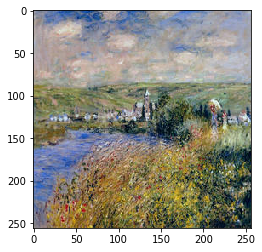

In [13]:
import matplotlib.pyplot as plt

img = plt.imread('./results/monet2photo_pretrained/test_latest/images/01100_real.png')
plt.imshow(img)

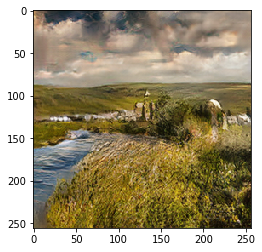

In [14]:
img = plt.imread('./results/monet2photo_pretrained/test_latest/images/01100_fake.png')
plt.imshow(img)

In [15]:
## this one is really good I think :o

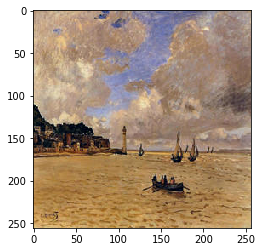

In [16]:
img = plt.imread('./results/monet2photo_pretrained/test_latest/images/00360_real.png')
plt.imshow(img)

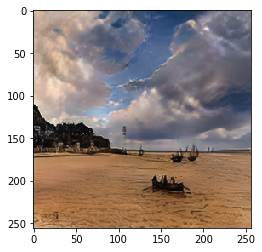

In [17]:
img = plt.imread('./results/monet2photo_pretrained/test_latest/images/00360_fake.png')
plt.imshow(img)

Changes and tuning done:
* epochs have been varied from 50 to 200.
* Learning rate policy has been explored.
* Cyclic re-run on genrated images has been done i other notebooks to explore any changes and improvements.
* The chanegs for reducing the blues and hue/tint issues have been specified in the report. We modify the lr-policy, --netG and --netD parameters to tune acc. to proposed weights for newer model and this atatins the outputs as illustrated.

> A lot of experimentation goes into finding the best hyperparameters such that the generators and discriminators don't overpower each other. 

> It's often a good starting point to look at existing papers to find what has worked in previous experiments. This has been studied hevaily to newer arXiv papers and the publicaitons, which have been instrumental in developing the newer simple run.